# Einführung in die Datenauswertung

Im Folgenden soll demonstriert werden, wie erzeugte Messdaten in PyVo eingelesen, verarbeitet und visualisiert werden. Hierfür werden Messwerte aus dem Praktikum verwendet. Die gemessenen und theoretischen Zeiten, sowie die Regressionskurven werden in einem s-t-Diagramm visualisiert. 

### Importieren der benötigten Bibliotheken

In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import math
from scipy.optimize import curve_fit

pd.options.mode.chained_assignment = None

### Tidy Data

Bei der Datenanalyse besteht en Großteil aus der Bereinigung und Vorbereitung der Daten. Ein wichtiger Aspekt der Datenbereinigung ist die Strukturierung der Datensätze, um die Analyse zu erleichtern. Strukturierte Datensätze sind einfach zu verarbeiten, zu analysieren und zu visualisieren: Versuche können als Tabelle dargestellt werden, wobei die Tabellenspalten die Variablen repräsentieren und die Beobachtungen in den Zeilen stehen. 

### Einlesen von CSV-Dateien

CSV-Dateien können über die Bibliotheken **csv** oder **pandas** eingelesen werden. Im Gegensatz zu **pandas** muss die **csv** Bibliothek nicht vor Verwendung gesondert installiert werden, sondern ist in der Python-Installation enthalten. Im Folgenden werden die Methoden zum Einlesen einer CSV-Datei mittels beider Bibliotheken vorgestellt. 

In [2]:
# mit csv Bibliothek:
# 1. Datei öffnen 
with open('Messdaten_V1.csv') as csvdatei:
    # 2. Lesen des Datein-Inhalts (als Liste)
    messwerte_csv = csv.reader(csvdatei, delimiter=',')
    # 3. Umwandeln in ein Dataframe
    messwerte_csv = pd.DataFrame(messwerte_csv)
    # 4. Erste Zeile als Header verwenden 
    messwerte_csv.columns = messwerte_csv.iloc[0]
    # 5. Erste Zeile entfernen
    messwerte_csv = messwerte_csv.drop([0])

messwerte_csv.head()

,Weg [m],Masse [g],TV,t1,t2,t3
1,0.2,0,M1,0.813,0.859,0.856
2,0.3,0,M1,1.034,1.096,1.126
3,0.4,0,M1,1.25,1.239,1.245
4,0.5,0,M1,1.38,1.362,1.385
5,0.6,0,M1,1.487,1.483,1.524


In [3]:
# mit pandas Bibliothek
# Einlesen der Datei   
messwerte_pd = pd.read_csv("Messdaten_V1.csv")
# Vorwissen über Datei nötig: besitzt einen Header, separator = ",", etc. 

messwerte_pd.tail()

,Weg [m],Masse [g],TV,t1,t2,t3
16,0.5,30,M3,1.479,1.511,1.495
17,0.5,40,M3,1.494,1.545,1.506
18,0.5,50,M3,1.522,1.551,1.556
19,0.5,60,M3,1.554,1.571,1.578
20,0.5,70,M3,1.609,1.649,1.589


Bei der Verwendung der **csv** Bibliothek, wird die Datei geöffnet, mit `csv.reader()`gelesen und der Inhalt als csv-Objekt abgespeichert. Dieses kann anschließend mittels der Dataframe-Funktion von **pandas** in eine Datentabelle umgewandelt werden. \
Bei der Benutzung der Funktion `read_csv()`von **pandas** wird der Inhalt der CSV-Datei direkt als Dataframe in einer Variable abgespeichert.

Nachdem die Datei eingelesen wurde, kann nun auf den Inhalt zugegriffen werden. Auch können simple statistische Werte können mit der **pandas** Funktion `describe()` für jede Spalte ermittelt werden (mehr unter [Pandas Descriptive Statistics](https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm)).

In [4]:
round(messwerte_pd.describe(), 3)

,Weg [m],Masse [g],t1,t2,t3
count,21.000,21.000,21.000,21.000,21.000
mean,0.500,13.333,0.959,0.974,0.975
std,0.167,22.657,0.695,0.704,0.703
min,0.200,0.000,0.029,0.029,0.029
25%,0.400,0.000,0.047,0.047,0.047
50%,0.500,0.000,1.380,1.362,1.385
75%,0.600,20.000,1.494,1.545,1.524
max,0.800,70.000,1.787,1.751,1.771


#### Berechnung theoretische Zeiten für die Wegstrecken & die Fallbeschleunigung

Der eingelesenen CSV-Datei können nun eine weitere Spalten hinzugefügt werden: Es soll jeweils zeilenweise der Mittelwert von t1-t3, die theoretische Zeit und die experimentelle Fallbeschleunigung hinzugefügt werden. Dies soll jedoch nur an Teilversuch M1 stattfinden. 

In [5]:
# Trennung von Teilversuch M1 von M2 und M3
# m1 ist ein Dataframe 
m1 = messwerte_pd[(messwerte_pd.loc[:,'TV'] == 'M1')]
# Zusatz: 
# m2 = messwerte_pd[(messwerte_pd.loc[:,('TV')] == 'M2')]
# m3 = messwerte_pd[(messwerte_pd.loc[:,('TV')] == 'M3')]

# Berechnung des Mittelwerts und abspeichern als neue Spalte
m1.loc[:,('mean_t [s]')] = messwerte_pd.loc[:,('t1','t2','t3')].mean(axis=1)

# gegebene Werte für weiteren Berechnungen
mass_1 = 11.1
mass_2 = 204.8

# Theoretische Zeiten (t_theo) für die gegebenen Wegstrecken berechnen
m1.loc[:,'t_theo [s]'] = np.sqrt((2 * m1.loc[:,'Weg [m]'] * (mass_1 + mass_2))/(mass_1 * 9.81))

# Fallbeschleunigung
m1.loc[:, 'g_exp [m/s²]'] = ((mass_1 + mass_2)*(2 * m1.loc[:,'Weg [m]'] / m1.loc[:,'mean_t [s]']**2)) / mass_1

m1

,Weg [m],Masse [g],TV,t1,t2,t3,mean_t [s],t_theo [s],g_exp [m/s²]
0,0.2,0,M1,0.813,0.859,0.856,0.842667,0.890554,10.956656
1,0.3,0,M1,1.034,1.096,1.126,1.085333,1.090702,9.907284
2,0.4,0,M1,1.250,1.239,1.245,1.244667,1.259434,10.044158
3,0.5,0,M1,1.380,1.362,1.385,1.375667,1.408090,10.277873
4,0.6,0,M1,1.487,1.483,1.524,1.498000,1.542485,10.401292
5,0.7,0,M1,1.601,1.640,1.656,1.632333,1.666074,10.219744
6,0.8,0,M1,1.787,1.751,1.771,1.769667,1.781108,9.937261


Das Dataframe kann nun mit den hinzugefügten Spalten im CSV-Format abgespeichert werden.

In [6]:
m1.to_csv("Messdaten_V1_mitWerten.csv", sep=";", index=False, header=True)

### Graphische Darstellung 
Die Werte können nun visualisiert werden. Dafür müssen die einzelnen Teilversuche M1-M3 voneinander getrennt werden, da hier nur die erste Messreihe M1 für die Visualisierung verwendet wird. 

In [7]:
# definieren der Funktion: 
# Regression für s(t) = m1 / (m1+m2) * (g/2) * t**2
def reg_func(t, g):
    return (mass_1 / (mass_1 + mass_2)) * (g / 2) * t**2

# Mittelwerte und Fehler der berechneten Fallbeschleunigungen berechnen
# wichtige Funktionen hier: mean() [Mittelwert], std() [Standardabweichung] und sqrt() [Quadratwurzel]
g_exp_mean = m1.loc[:,'g_exp [m/s²]'].mean()
g_exp_error = m1.loc[:,'g_exp [m/s²]'].std() / math.sqrt(len(m1.loc[:,'g_exp [m/s²]']))

print(f"⟨g_exp⟩ = {g_exp_mean} ± {g_exp_error} ")


⟨g_exp⟩ = 10.249181099944925 ± 0.136414111332273 


#### s-t-Diagramm und Regression der theoretischen und gemessenen Zeiten:

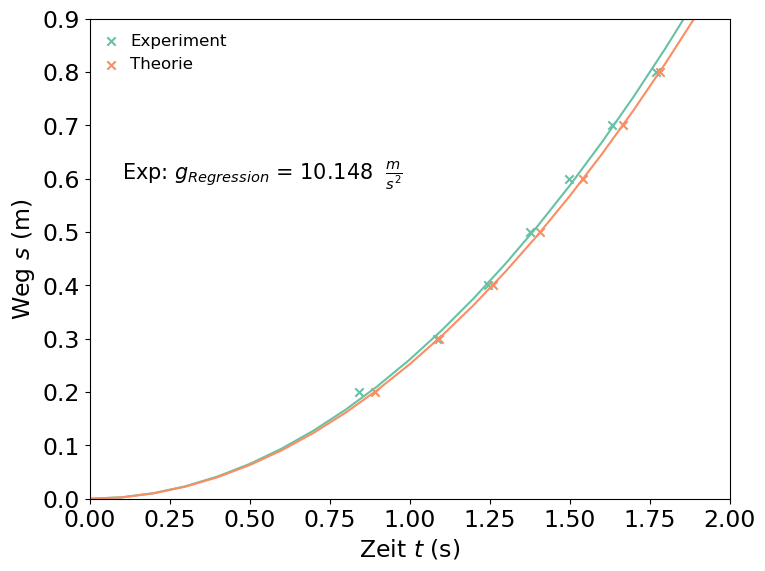

In [8]:
# Regression Experiment
popt_exp, pcov_exp = curve_fit(reg_func, m1['mean_t [s]'], m1['Weg [m]'])

# Regression Theorie
popt_theorie, pcov_theorie = curve_fit(reg_func, m1['t_theo [s]'], m1['Weg [m]'])
# Funktion curve_fit benötigt die Zeiten t und die Wegstrecken s aus der Messung 
# optimiert die Fallbeschleunigung g

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(y = m1['Weg [m]'],x = m1['mean_t [s]'], color='#66c2a5', marker = 'x')
ax.scatter(y = m1['Weg [m]'], x = m1['t_theo [s]'], color='#fc8d62', marker = 'x')
ax.plot(np.arange(0,2,0.1).reshape((-1,1)), reg_func(np.arange(0,2,0.1).reshape((-1,1)), popt_exp[0]),color='#66c2a5')
ax.plot(np.arange(0,2,0.1).reshape((-1,1)), reg_func(np.arange(0,2,0.1).reshape((-1,1)), popt_theorie[0]),color='#fc8d62')
ax.set_xlabel("Zeit $\mathit{t}$ (s)",fontsize=17 )
ax.set_ylabel("Weg $\mathit{s}$ (m)", fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=17)
ax.set_xlim([0,2])
ax.set_ylim([0,0.9])
ax.legend(['Experiment', 'Theorie'],frameon=False, handlelength=0.75, fontsize='large')
t1 = [r"$g_{Regression}$", r" $\frac{m}{s^2}$"  ]
ax.text(0.1, 0.6, f"Exp: {t1[0]} = {round(popt_exp[0],3)} {t1[1]}", fontsize=15)
plt.show()

# Abbildung speichern
fig.savefig("V1_RegressionM1.png", bbox_inches='tight', dpi=300)